In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import RocCurveDisplay,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
cols = ['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']
df = pd.read_csv("./glass.data", names=cols)

In [3]:
df.sample(5)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
203,204,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
13,14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
108,109,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2
145,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
71,72,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2


In [4]:
df.drop(columns="Id_number",inplace=True)

In [5]:
df.shape

(214, 10)

In [6]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type_of_glass,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


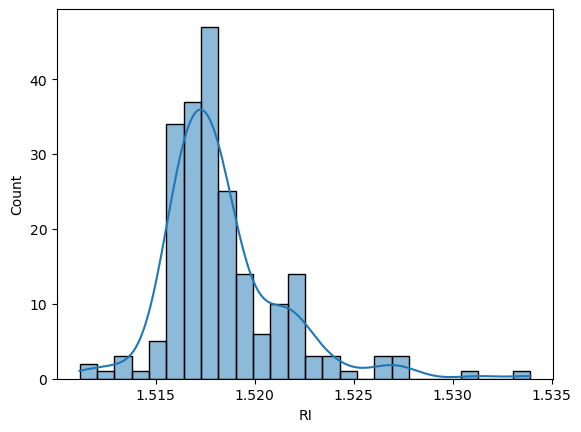

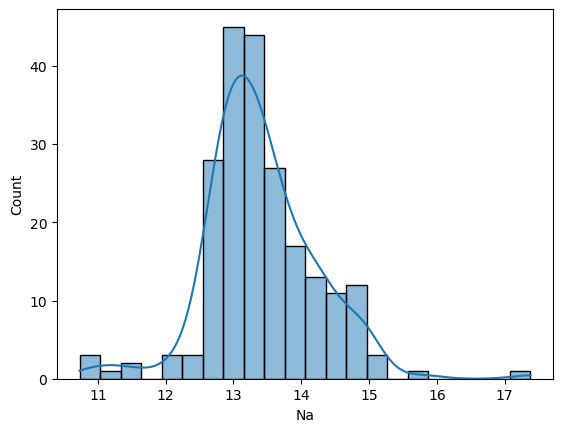

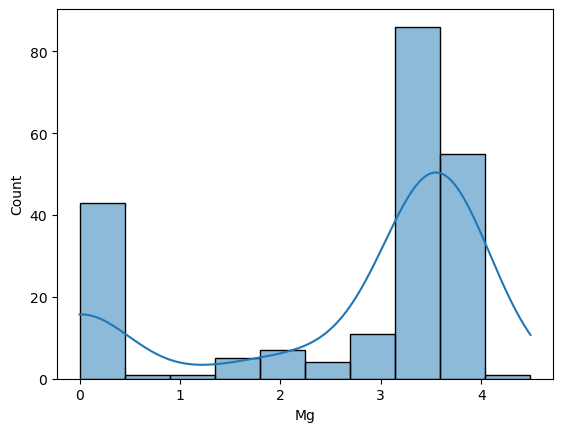

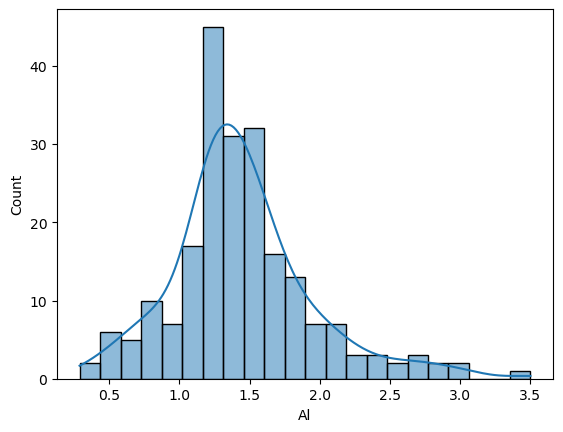

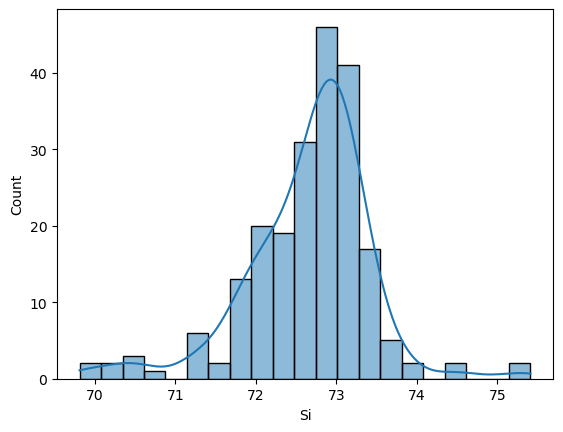

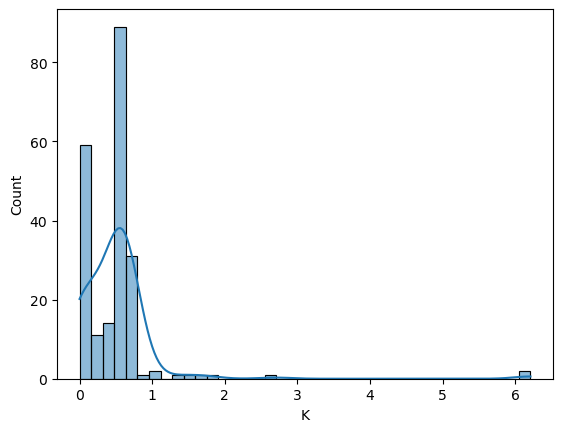

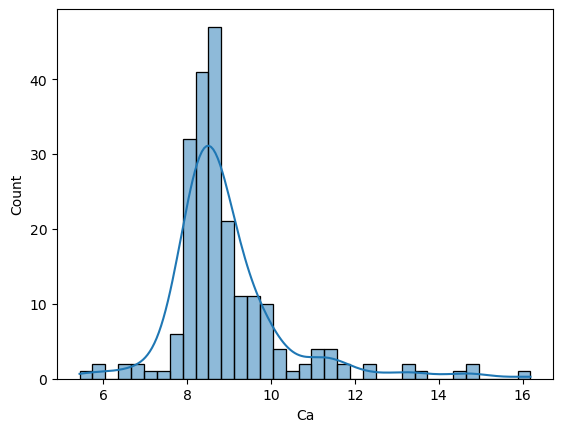

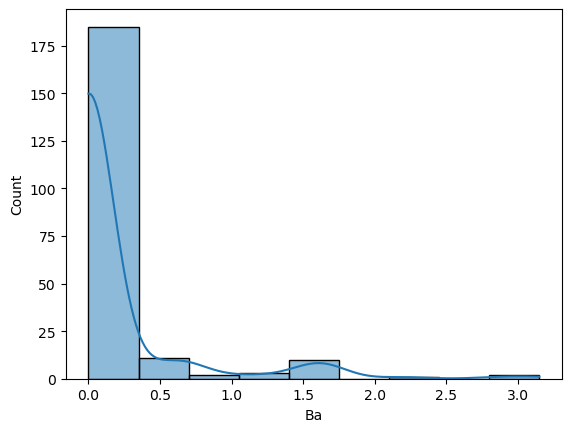

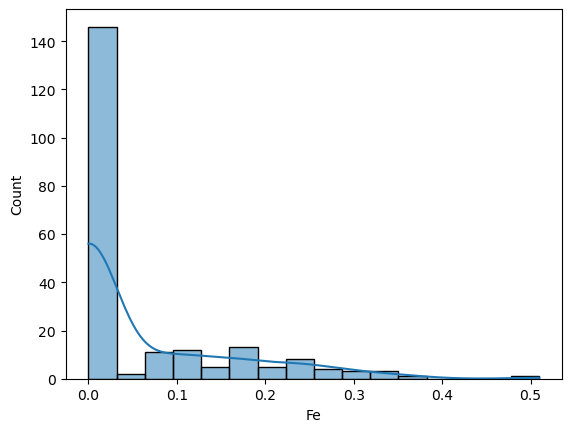

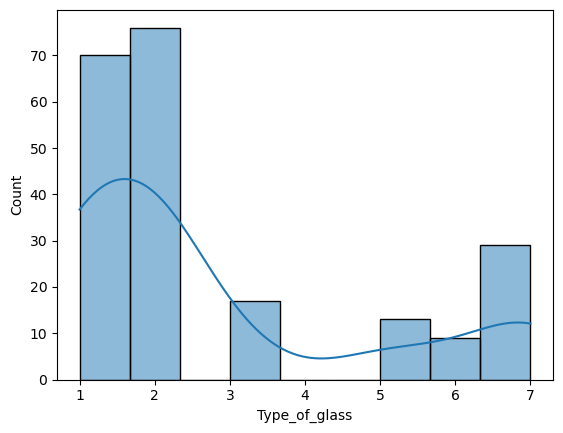

In [9]:
for i in df.columns:
    if i =="Id_number":
        pass
    else:
        sns.histplot(data=df,x=i,kde=True)
        plt.show()

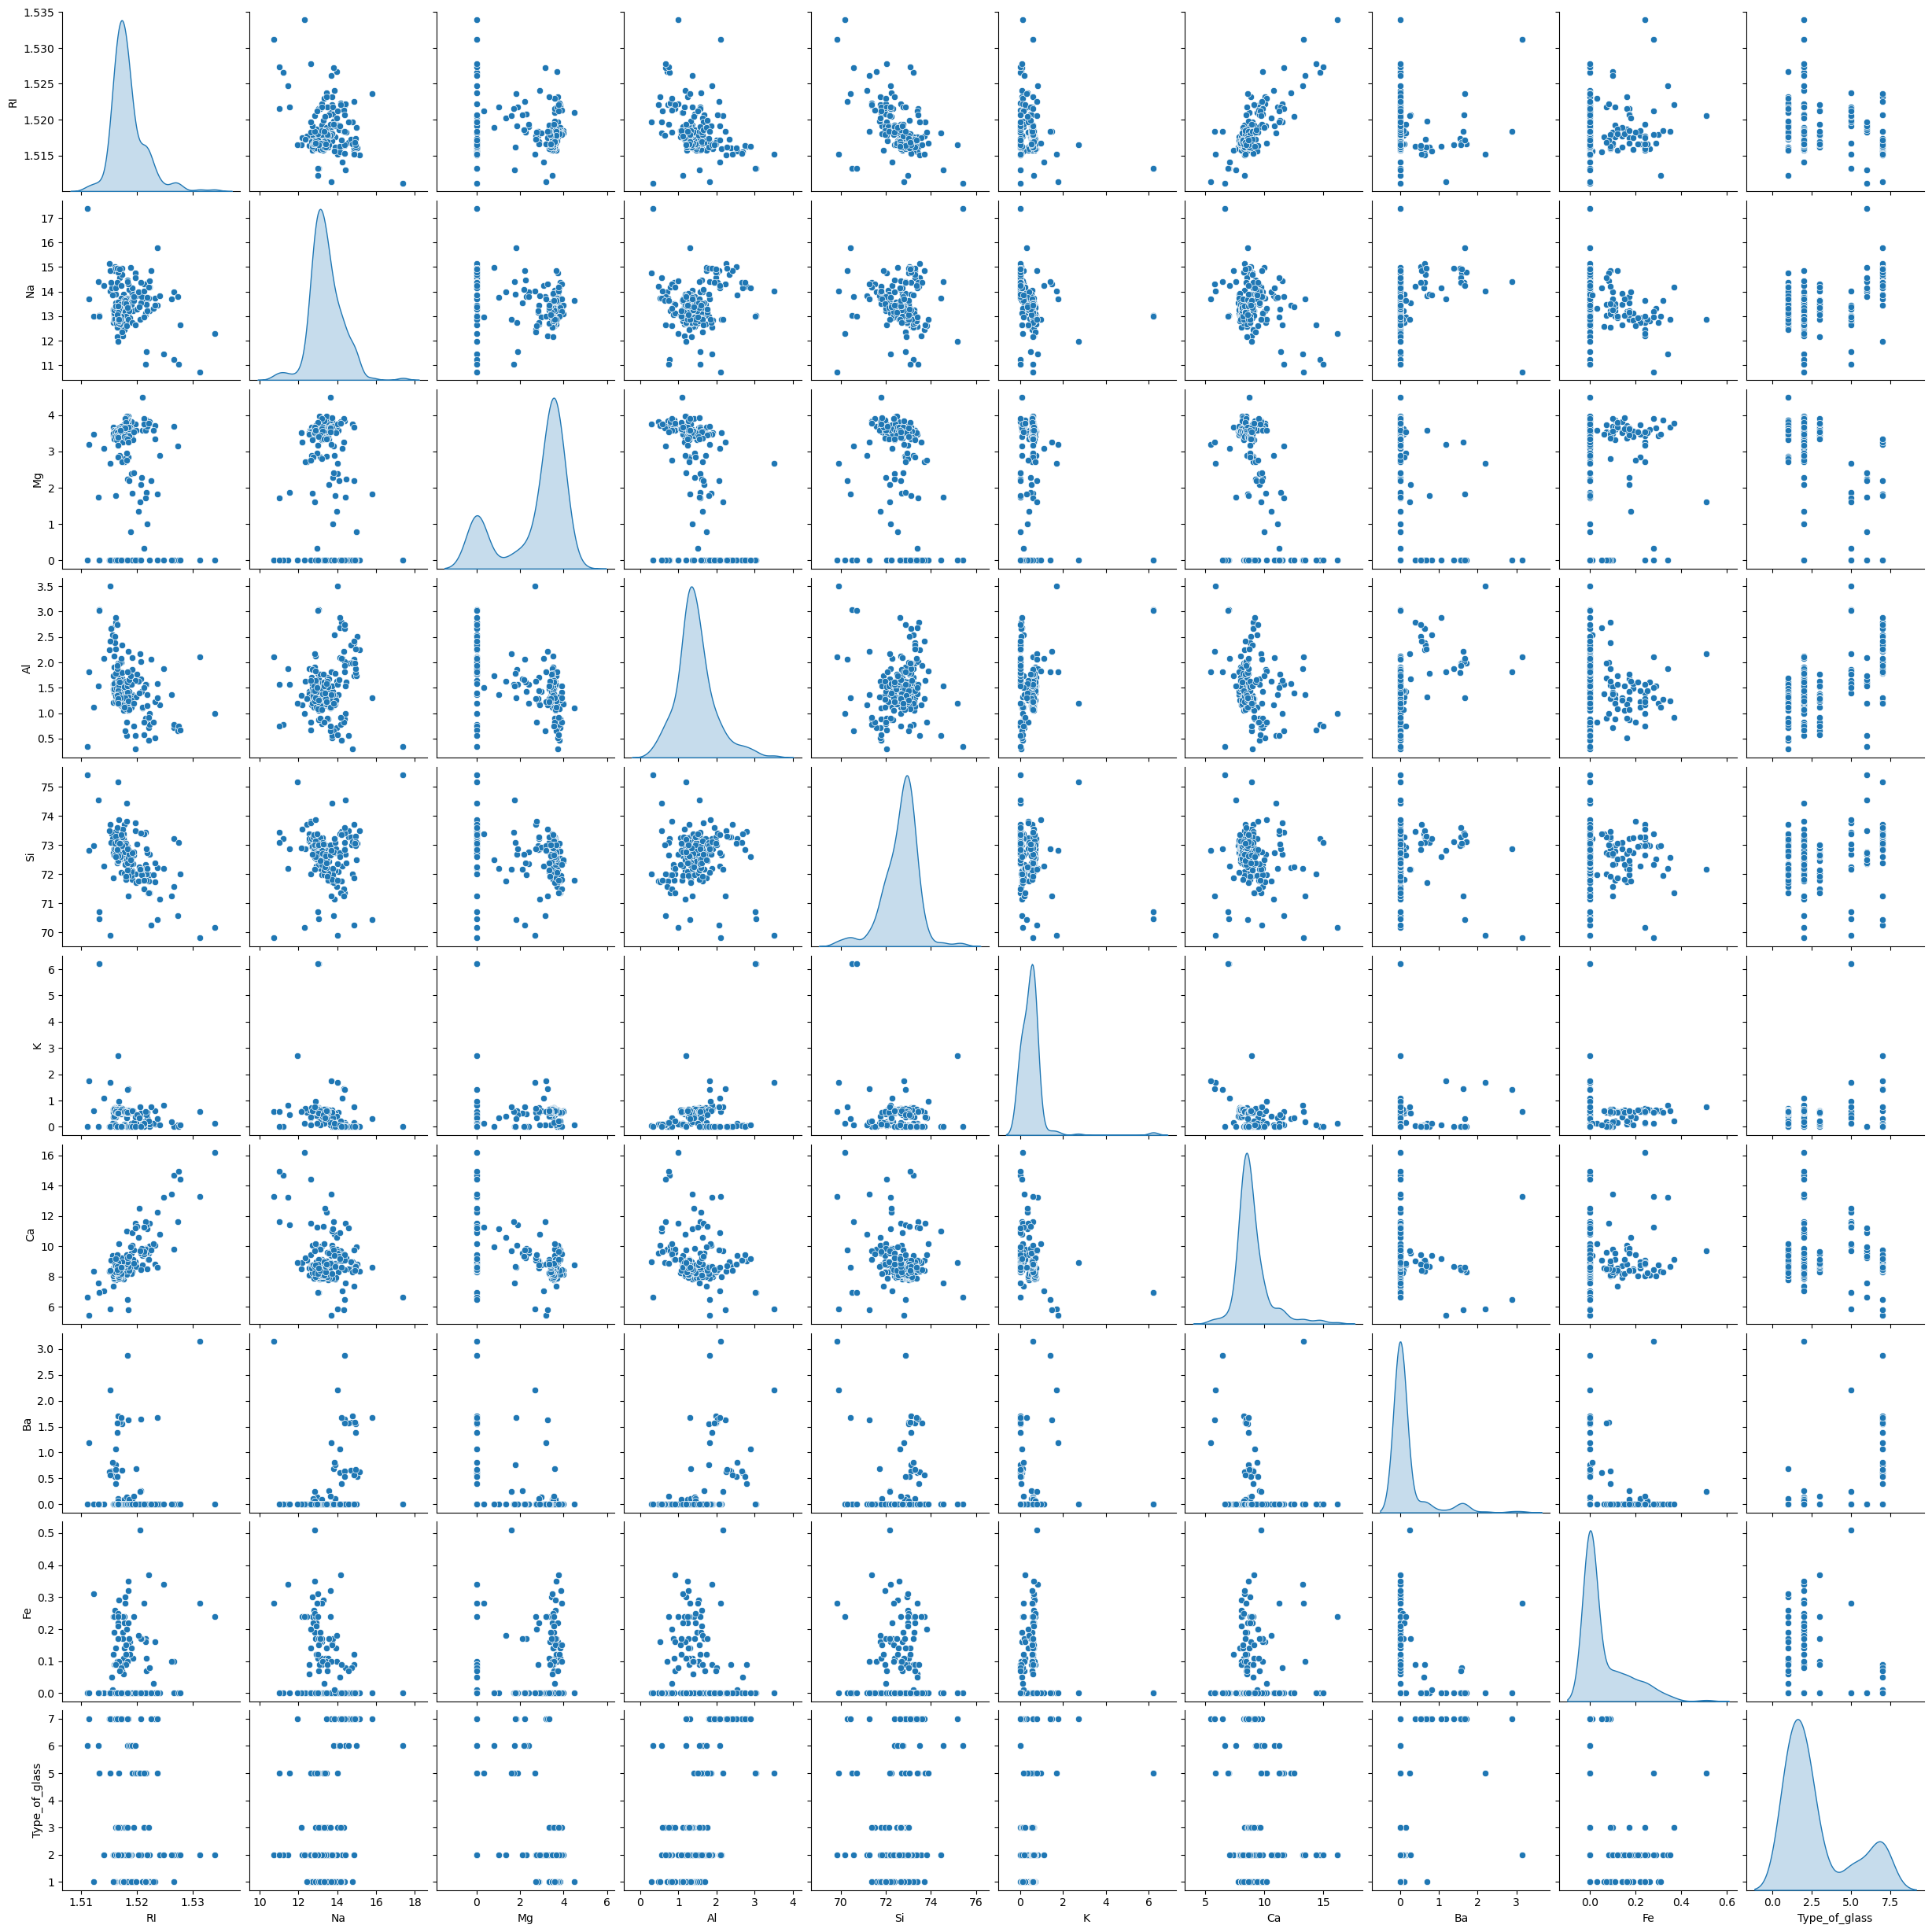

In [10]:
sns.pairplot(data=df,diag_kind='kde');

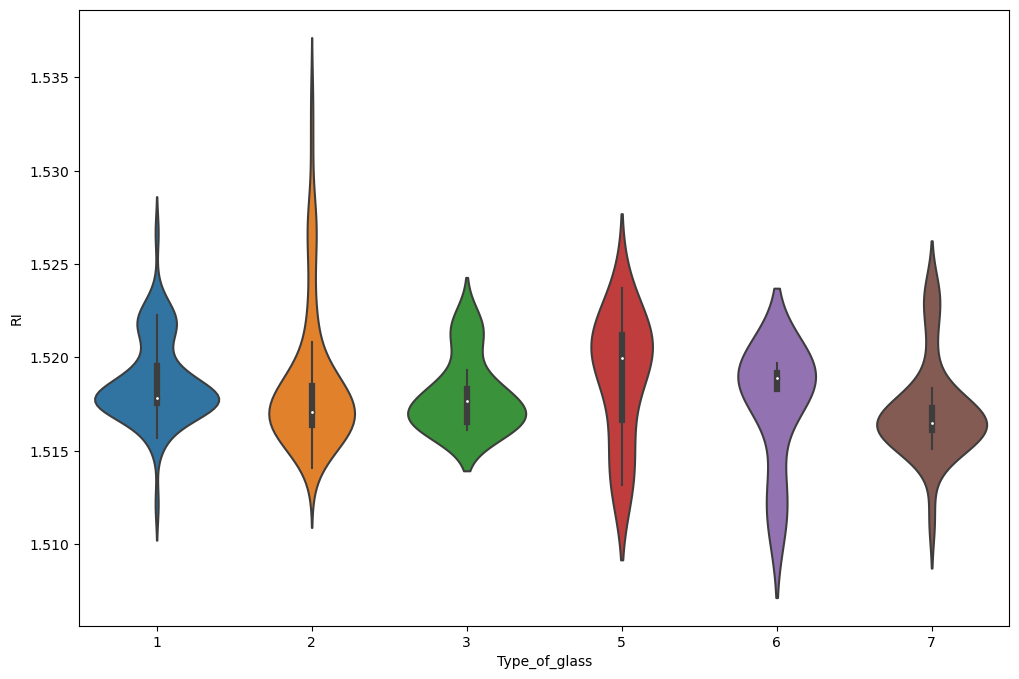

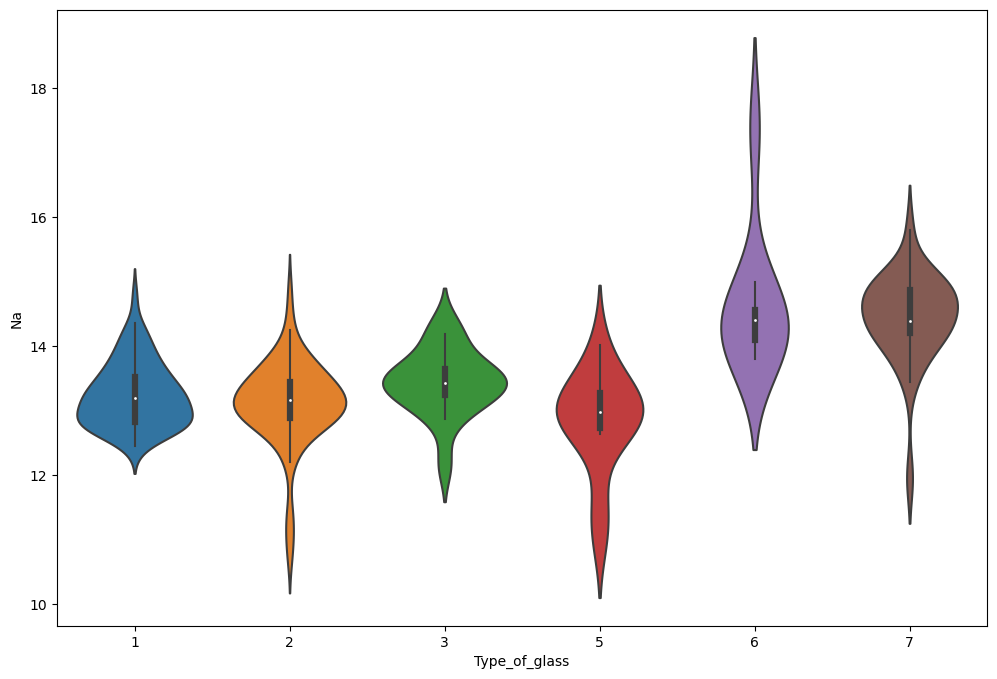

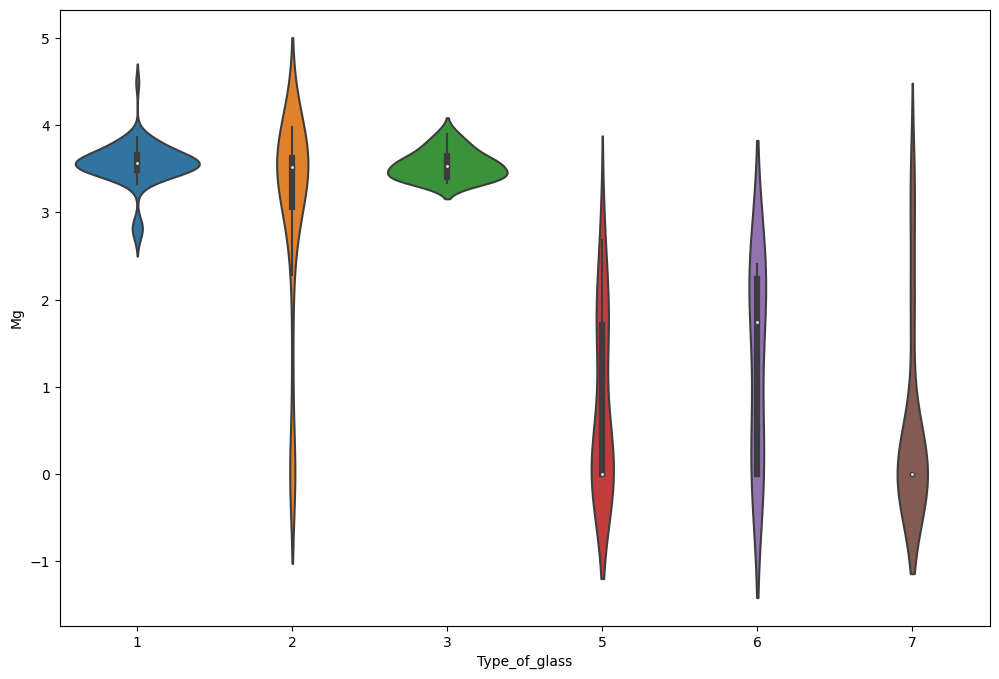

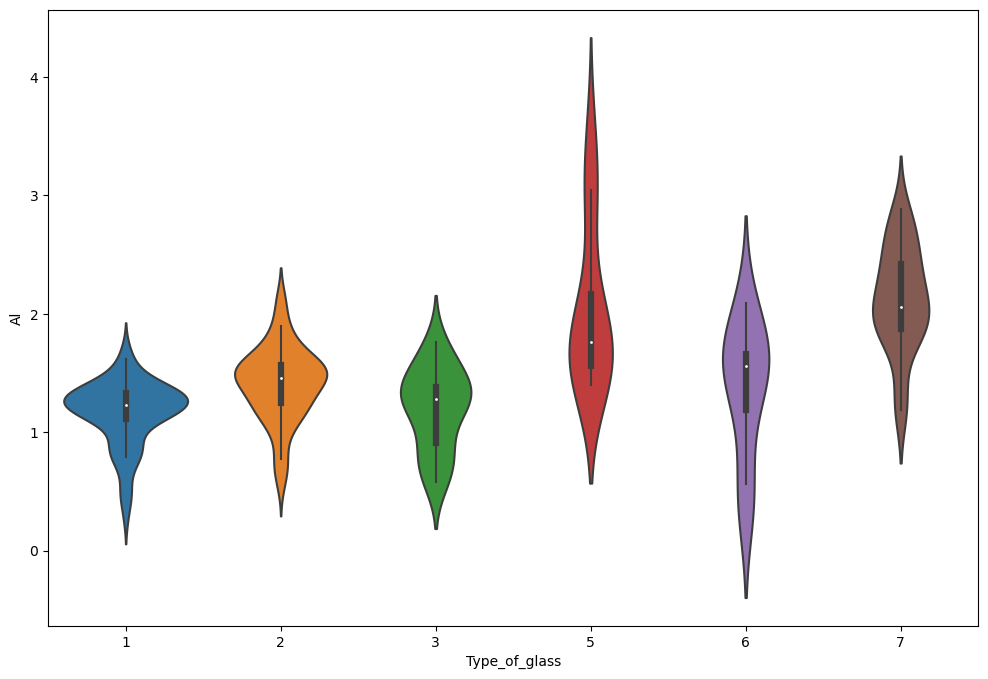

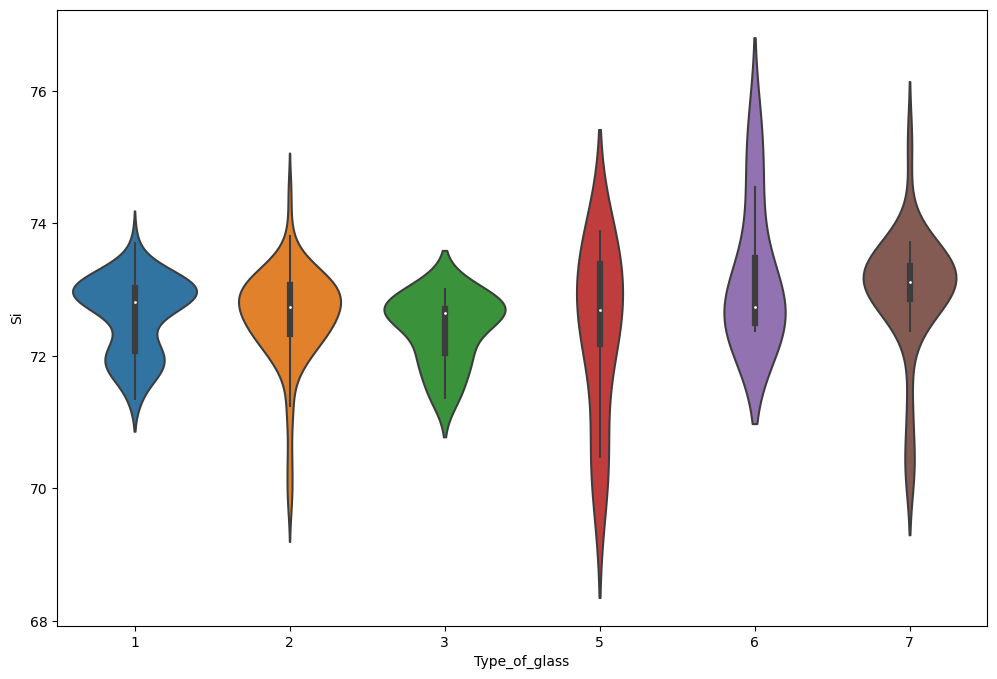

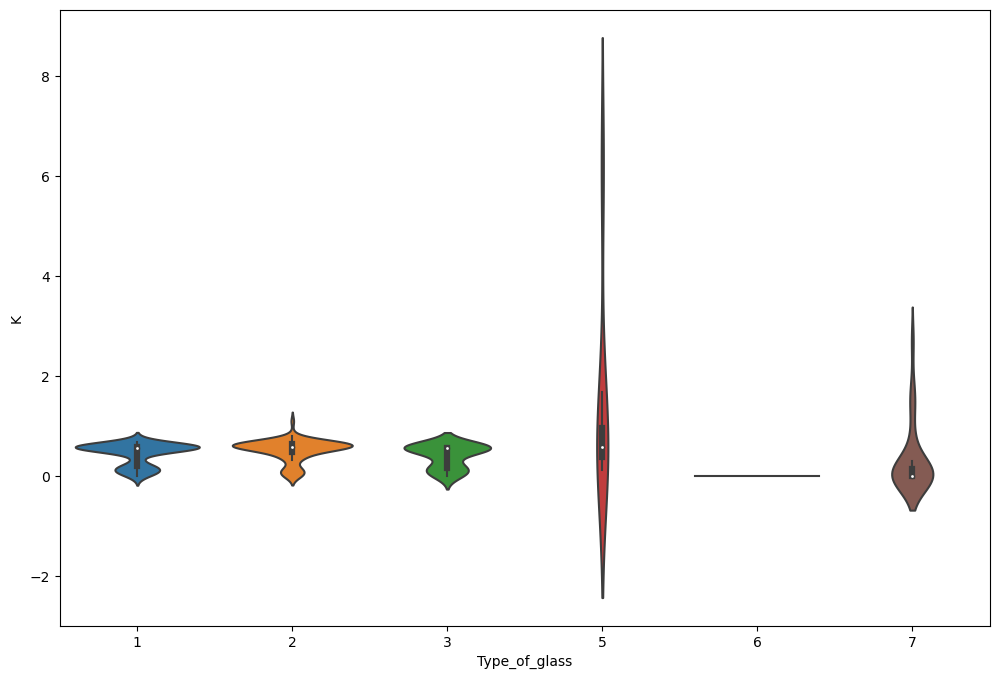

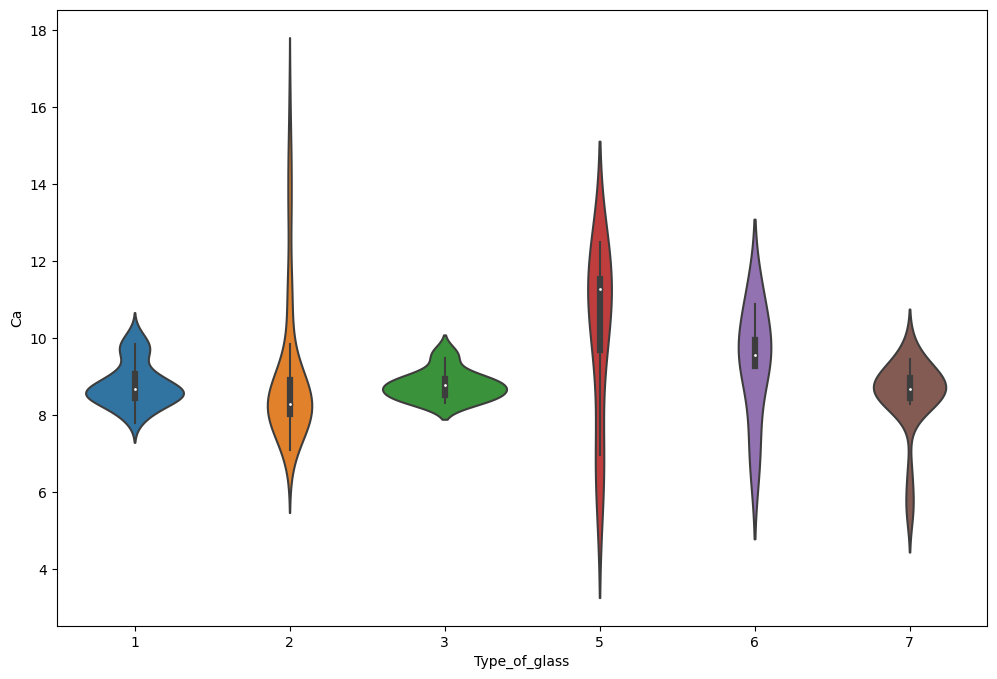

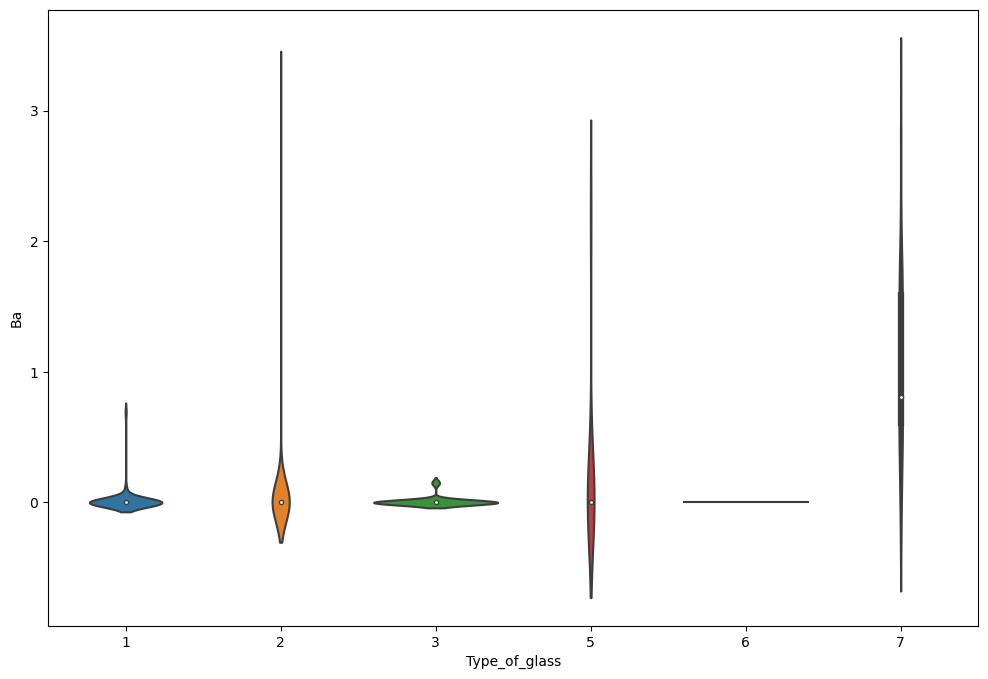

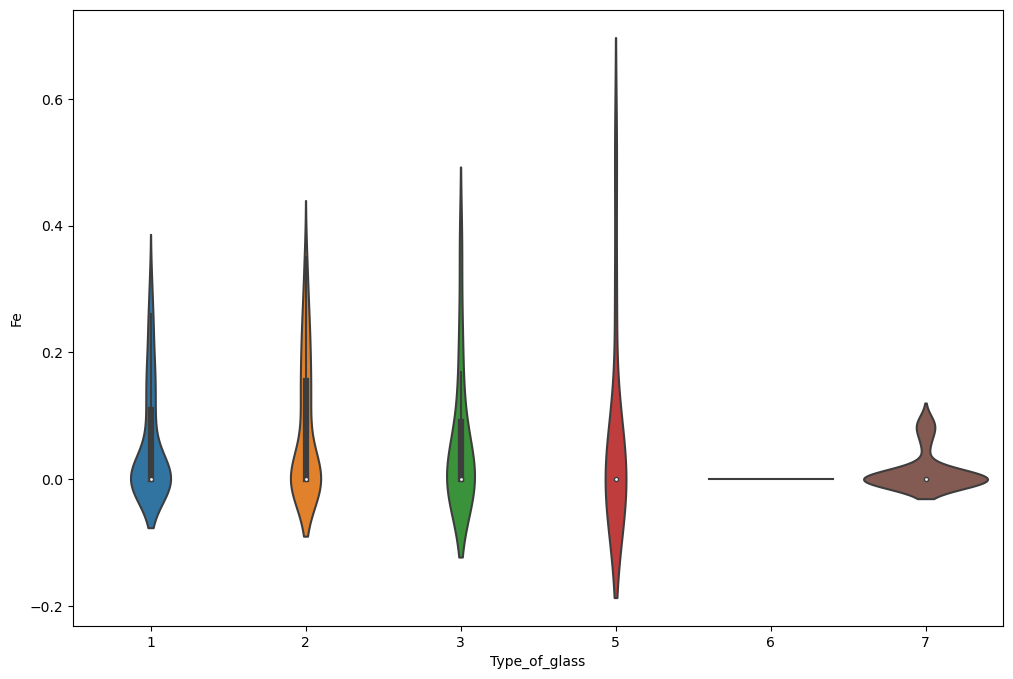

In [11]:
for i in df.columns:
    if i != "Type_of_glass":
        plt.figure(figsize=(12,8))
        sns.violinplot(data=df, x="Type_of_glass", y=i)
        plt.show()

In [12]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [13]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(x)

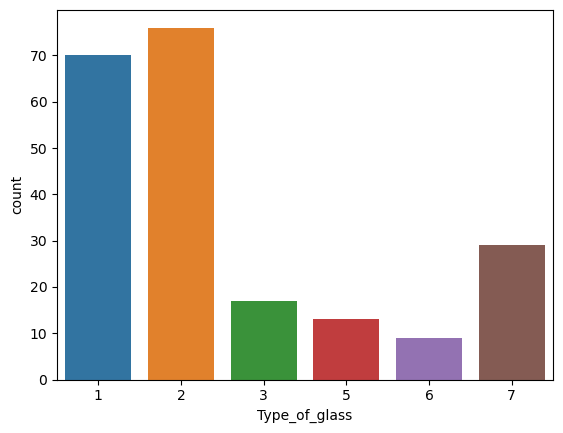

In [15]:
sns.countplot(data=df, x = 'Type_of_glass');

In [16]:
from imblearn. over_sampling import SMOTE

In [17]:
smote = SMOTE()

In [18]:
x_smote, y_smote = smote.fit_resample(x,y)

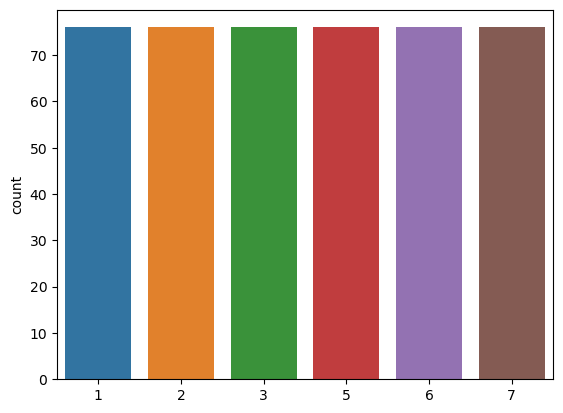

In [19]:
sns.countplot(x = y_smote);

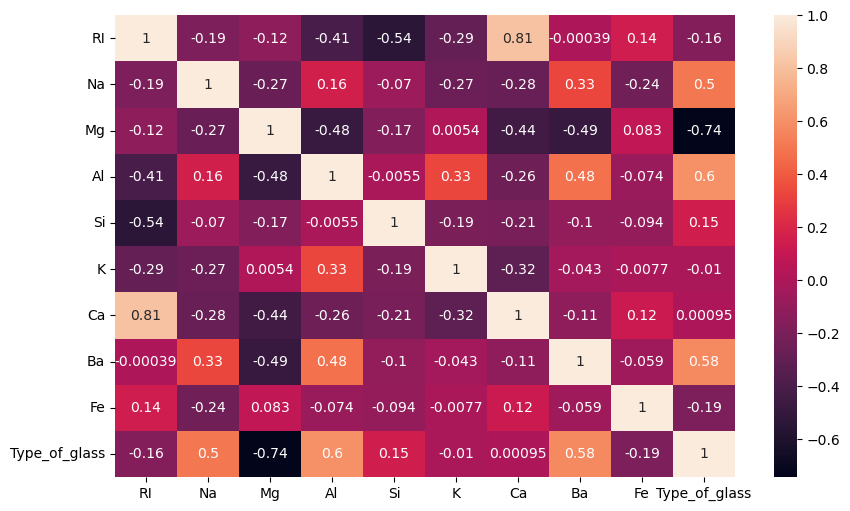

In [20]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True);

### Correlation summary

From the above heatmap it's obvious that none of the features have a very significant relation to the 'type of glass'.Yet Na. Al and Ba shows a good correlation to the 'type of glass'.Ca has more impact on RI of glass
.

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)

In [22]:
x_train.shape

(364, 9)

In [23]:
y_train.shape

(364,)

In [24]:
model =RandomForestClassifier()

In [25]:
model.fit(x_train,y_train)
trainingscore =accuracy_score(y_train,model.predict(x_train))
testingscore = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test =confusion_matrix(y_test,model.predict(x_test))
print('trainaccuracy:',trainingscore)
print('testaccuracy:',testingscore)
print('confusion matrix train:',con_train)
print('confusion matrix test:',con_test)
print('wrong prediction:',(y_test!=model.predict(x_test)).sum(),'/',((y_test==model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

trainaccuracy: 1.0
testaccuracy: 0.9021739130434783
confusion matrix train: [[63  0  0  0  0  0]
 [ 0 63  0  0  0  0]
 [ 0  0 59  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 59  0]
 [ 0  0  0  0  0 60]]
confusion matrix test: [[ 9  2  2  0  0  0]
 [ 3  9  1  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 17  0]
 [ 1  0  0  0  0 15]]
wrong prediction: 9 / 92


In [28]:
classification_report(y_test,model.predict(x_test))

'              precision    recall  f1-score   support\n\n           1       0.69      0.69      0.69        13\n           2       0.82      0.69      0.75        13\n           3       0.85      1.00      0.92        17\n           5       1.00      1.00      1.00        16\n           6       1.00      1.00      1.00        17\n           7       1.00      0.94      0.97        16\n\n    accuracy                           0.90        92\n   macro avg       0.89      0.89      0.89        92\nweighted avg       0.90      0.90      0.90        92\n'

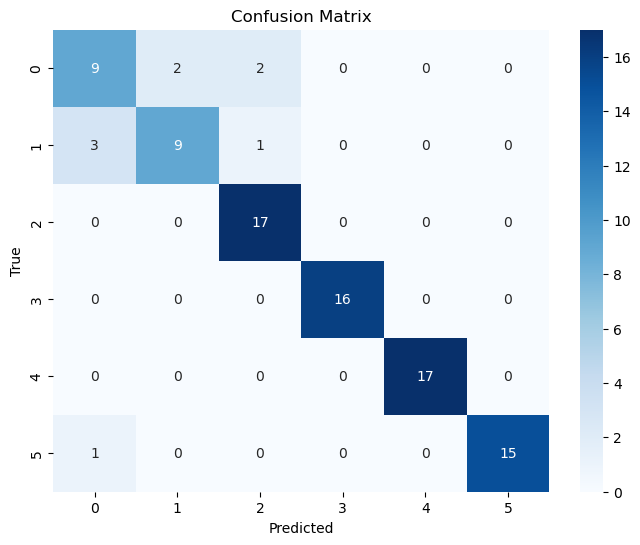

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap( con_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()